In [1]:
from tqst_class import *

In [45]:
tomo = tQST(4)
nq = tomo.get_num_of_qubits()
print(nq)

diagonal = np.zeros(nq**2)
diagonal[0]=1/4
diagonal[3]=1/4
diagonal[12]=1/4
diagonal[15]=1/4
# diagonal=diagonal/np.sum(diagonal)
tomo.set_diagonal_counts(diagonal)
tdict = tomo.get_diagonal_counts()

gini = dmt.gini_index(diagonal)
threshold = tomo.set_threshold(gini)


offd_projs = tomo.get_projs_to_measure()
print("nb of measurement necessary: ", np.shape(offd_projs))

Number of qubits set to 4.
4
Diagonal counts are now set.
The threshold is now set to 0.05.
These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (0, 3, 'r')   |   |HHDD>  |
|  (0, 3, 'i')   |   |HHDR>  |
|  (0, 12, 'r')  |   |DDHH>  |
|  (0, 12, 'i')  |   |DRHH>  |
|  (0, 15, 'r')  |   |DDDD>  |
|  (0, 15, 'i')  |   |DDDR>  |
|  (3, 12, 'r')  |   |DRDR>  |
|  (3, 12, 'i')  |   |DRDD>  |
|  (3, 15, 'r')  |   |DDVV>  |
|  (3, 15, 'i')  |   |DRVV>  |
| (12, 15, 'r')  |   |VVDD>  |
| (12, 15, 'i')  |   |VVDR>  |
+----------------+-----------+
nb of measurement necessary:  (12,)


1. dare i veri valori della diagonale

In [38]:
import pandas as pd

DIR=r'C:\Users\sc266065\Documents\HyperEntanglement'
folder=r'\Instruments_control\programs\HyperEntanglement\Tomo'
filename_diag='\Tomo_17Dic_Diag_all_Diego'
fpath=DIR+folder+filename_diag


print("Loading... ", filename_diag)
data = np.loadtxt(fpath+'.txt', delimiter=',', comments='#', dtype=str)

binary_strings=data[:,0]
coinc=data[:,1]

## ORder the binary data
indexed_binary_strings = enumerate(binary_strings)
sorted_with_indexes = sorted(indexed_binary_strings, key=lambda x: int(x[1], 2))

# Extract sorted strings and their original indexes
sorted_strings = [x[1] for x in sorted_with_indexes]
sorted_indexes = [x[0] for x in sorted_with_indexes]

diag_coinc=coinc[sorted_indexes]

print("Sorted Binary Strings:", sorted_strings)
print("Original Indexes:", sorted_indexes)
print("original coinc:", coinc)
print("diag_coinc, ordered:", diag_coinc)

# Convert each string to a float
diag_coinc_arr = [float(x) for x in diag_coinc]
tomo.set_diagonal_counts(diag_coinc_arr)

Loading...  \Tomo_17Dic_Diag_all_Diego
Sorted Binary Strings: ['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111']
Original Indexes: [0, 4, 8, 12, 1, 5, 9, 13, 2, 6, 10, 14, 3, 7, 11, 15]
original coinc: [' 305.0' ' 329.0' ' 262.0' ' 321.0' ' 3.0' ' 0.0' ' 5.0' ' 5.0' ' 1.0'
 ' 0.0' ' 0.0' ' 0.0' ' 255.0' ' 258.0' ' 200.0' ' 236.0']
diag_coinc, ordered: [' 305.0' ' 3.0' ' 1.0' ' 255.0' ' 329.0' ' 0.0' ' 0.0' ' 258.0' ' 262.0'
 ' 5.0' ' 0.0' ' 200.0' ' 321.0' ' 5.0' ' 0.0' ' 236.0']
Diagonal counts are now set.


<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
C:\Users\sc266065\AppData\Local\Temp\ipykernel_24184\2882823701.py:5: SyntaxWarning: invalid escape sequence '\T'
  filename_diag='\Tomo_17Dic_Diag_all_Diego'


2. definire i proiettori reali
3. dare i counts misurati per ciascun proiettore

[[ 1.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j
   0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j
   0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    1.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j
   0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j
   0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    1.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j
   0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j
   0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    1.  +0.j    0.  +0.j    0.  +0.j
   0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j
   0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    1.  +0.j    0.  +0.j
   0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j
   0.  +0.j    0.  +0.j    0.  +0.j    0.  +0.j  ]
 [ 0.  +0.j    0.  +0.j  

c:\Users\sc266065\Documents\HyperEntanglement\thresholdqst\density_matrix_tool.py:325: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(z_lbls)


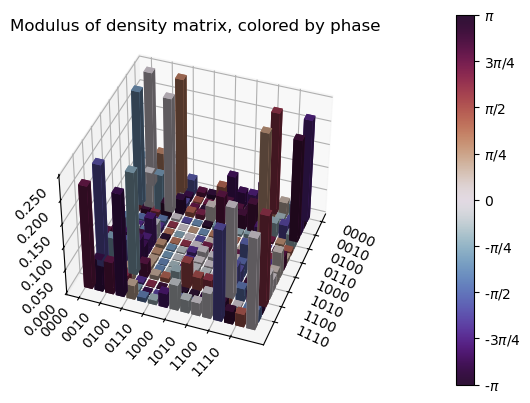

In [46]:
# ### SET THE PROJECTORS
# print(offd_projs[0])
# projs[0]=HDHD
# print(projs[0])

##### FIRST WAY #####
# offd_counts = [0.5, 0.25]
offd_counts = np.zeros(len(offd_projs))
offd_counts[0]=0.5
# counts = counts * 1e3

tomo.set_projs_and_counts(offd_projs, offd_counts)
projs, counts = tomo.get_projs_and_counts()
# print(np.shape(projs))
print(projs)
# print(np.shape(counts))
# print(counts)
#####


#### SECOND WAY #####

# proj_to_meas = tomo.get_projectors_to_measure()

# tdict.setdefault('DD', 0.5)
# print(tdict)
# tdict.setdefault('DR', 0.25)

# #print(tdict)

# projs, counts = tomo.read_tomo_dictionary(tdict)
####

tomo.set_density_matrix_model(model_triangular)

rho_rec = tomo.get_density_matrix(projs, counts)

dmt.plot_density_matrix_3D(rho_rec)

In [29]:
HDHD=np.zeros(nq**2)
HDHD[0]=0.5
HDHD[1]=0.5
HDHD[2]=0.5
HDHD[3]=0.5

HDHR=np.zeros(nq**2, dtype=np.complex128)
HDHR[0]=0.5
HDHR[1]=0.5j
HDHR[2]=0.5
HDHR[3]=0.5j

DHDH=np.zeros(nq**2, dtype=np.complex128)
DHDH[0]=0.5
DHDH[2]=0.5
DHDH[8]=0.5
DHDH[10]=0.5

DHRH=np.zeros(nq**2, dtype=np.complex128)
DHRH[0]=0.5
DHRH[2]=0.5j
DHRH[8]=0.5
DHRH[10]=0.5j

DDDD=np.zeros(nq**2, dtype=np.complex128)+0.25

DDDR=np.zeros(nq**2, dtype=np.complex128)
for index in range(len(DDDR)):
    if index % 2 == 0:
        DDDR[index]=0.25
    else: 
        DDDR[index]=0.25j

# RRRR=np.zeros(nq**2, dtype=np.complex128)
RRRR=np.array([0.25,0.25j,0.25j,-0.25,0.25j,-0.25,-0.25,-0.25j,0.25j,-0.25,-0.25,-0.25j,-0.25,-0.25j,-0.25j,0.25])

RRRD=np.array([0.25,0.25,0.25j,0.25j,0.25j,0.25j,-0.25,-0.25,0.25j,0.25j,-0.25,-0.25,-0.25,-0.25,-0.25j,-0.25j])

DVDV=np.zeros(nq**2, dtype=np.complex128)
DVDV[5]=0.5
DVDV[7]=0.5
DVDV[13]=0.5
DVDV[15]=0.5

DVRV=np.zeros(nq**2, dtype=np.complex128)
DVRV[5]=0.5
DVRV[7]=0.5j
DVRV[13]=0.5
DVRV[15]=0.5j

VDVD=np.zeros(nq**2, dtype=np.complex128)
VDVD[0]=0.5
VDVD[1]=0.5
VDVD[4]=0.5
VDVD[5]=0.5

VDVR=np.zeros(nq**2, dtype=np.complex128)
VDVR[0]=0.5
VDVR[1]=0.5j
VDVR[4]=0.5
VDVR[5]=0.5j



Proj_dict = { 
    'HDHD' : {
            'name':'HDHD',
            'vect': HDHD,
             },
    'HDHR' : {
            'name':'HDHR',
            'vect': HDHR,
             },
    'DHDH' : {
            'name':'DHDH',
            'vect': DHDH,
             },
    'DHRH' : {
            'name':'DHRH',
            'vect': DHRH,
             },
    'DDDD' : {
            'name':'DDDD',
            'vect': DDDD,
             },
    'DDDR' : {
            'name':'DDDR',
            'vect': DDDR,
             },
    'RRRR' : {
            'name':'RRRR',
            'vect': RRRR,
             },
    'RRRD' : {
            'name':'RRRD',
            'vect': RRRD,
             },
    'DVDV' : {
            'name':'DVDV',
            'vect': DVDV,
             },
    'DVRV' : {
            'name':'DVRV',
            'vect': DVRV,
             },
    'VDVD' : {
            'name':'VDVD',
            'vect': VDVD,
             },
    'VDVR' : {
            'name':'VDVR',
            'vect': VDVR,
             },
}

print(Proj_dict)

{'HDHD': {'name': 'HDHD', 'vect': array([0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. ])}, 'HDHR': {'name': 'HDHR', 'vect': array([0.5+0.j , 0. +0.5j, 0.5+0.j , 0. +0.5j, 0. +0.j , 0. +0.j ,
       0. +0.j , 0. +0.j , 0. +0.j , 0. +0.j , 0. +0.j , 0. +0.j ,
       0. +0.j , 0. +0.j , 0. +0.j , 0. +0.j ])}, 'DHDH': {'name': 'DHDH', 'vect': array([0.5+0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
       0. +0.j, 0.5+0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j,
       0. +0.j, 0. +0.j])}, 'DHRH': {'name': 'DHRH', 'vect': array([0.5+0.j , 0. +0.j , 0. +0.5j, 0. +0.j , 0. +0.j , 0. +0.j ,
       0. +0.j , 0. +0.j , 0.5+0.j , 0. +0.j , 0. +0.5j, 0. +0.j ,
       0. +0.j , 0. +0.j , 0. +0.j , 0. +0.j ])}, 'DDDD': {'name': 'DDDD', 'vect': array([0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
       0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
       0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])}, 'DDDR': {'name': 

In [30]:
Proj_dict[offd_projs[0]]['vect']

array([0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. ])

In [41]:
def W_tb_si(Css, Csl, Cls, Cll, phs_s, phi_s, phs_l, phi_l):
    W=np.zeros([4,4], dtype=np.complex128)
    W[0,0]=Css*np.exp((phs_s+phi_s)*1j)
    W[1,0]=Cls*np.exp((phs_l+phi_s)*1j)
    W[2,0]=Csl*np.exp((phs_s+phi_l)*1j)
    W[3,0]=Cll*np.exp((phs_l+phi_l)*1j)
    W[1,1]= W[0,0]
    W[3,2]= W[3,0]
    W[3,3]= W[2,0]
    W[3,3]= W[0,0]

    return W

def W_fb(J0, J1, J_1, theta):
    W=np.zeros([2,2], dtype=np.complex128)
    W[0,0]=J0
    W[1,1]=W[0,0]
    W[0,1]=J_1*np.exp(- theta *1j)
    W[1,0]=J1*np.exp(theta *1j)

    return W

def W_fb_si(J0_s, J1_s, J_1_s, ph_s, J0_i, J1_i, J_1_i, ph_i):
    W_s=W_fb(J0_s, J1_s, J_1_s, ph_s)
    W_i=W_fb(J0_i, J1_i, J_1_i, ph_i)
    W=np.kron(W_s,W_i) 

    return W

W_tb_si=W_tb_si(1,1,1,1,0,0,0,np.pi)
print(W_tb_si)

W_fb_s=W_fb(1,1,1,np.pi)
W_fb_i=W_fb(1,1,1,np.pi)
print(W_fb_s)

W_fb_si=W_fb_si(1,1,1,np.pi,1,1,1,np.pi)
print(W_fb_si)

Wexp=np.kron(W_tb_si,W_fb_si)
print(Wexp)


[[ 1.+0.0000000e+00j  0.+0.0000000e+00j  0.+0.0000000e+00j
   0.+0.0000000e+00j]
 [ 1.+0.0000000e+00j  1.+0.0000000e+00j  0.+0.0000000e+00j
   0.+0.0000000e+00j]
 [-1.+1.2246468e-16j  0.+0.0000000e+00j  0.+0.0000000e+00j
   0.+0.0000000e+00j]
 [-1.+1.2246468e-16j  0.+0.0000000e+00j -1.+1.2246468e-16j
   1.+0.0000000e+00j]]
[[ 1.+0.0000000e+00j -1.-1.2246468e-16j]
 [-1.+1.2246468e-16j  1.+0.0000000e+00j]]
[[ 1.+0.0000000e+00j -1.-1.2246468e-16j -1.-1.2246468e-16j
   1.+2.4492936e-16j]
 [-1.+1.2246468e-16j  1.+0.0000000e+00j  1.+0.0000000e+00j
  -1.-1.2246468e-16j]
 [-1.+1.2246468e-16j  1.+0.0000000e+00j  1.+0.0000000e+00j
  -1.-1.2246468e-16j]
 [ 1.-2.4492936e-16j -1.+1.2246468e-16j -1.+1.2246468e-16j
   1.+0.0000000e+00j]]
[[ 1.+0.0000000e+00j -1.-1.2246468e-16j -1.-1.2246468e-16j
   1.+2.4492936e-16j  0.+0.0000000e+00j  0.-0.0000000e+00j
   0.-0.0000000e+00j  0.+0.0000000e+00j  0.+0.0000000e+00j
   0.-0.0000000e+00j  0.-0.0000000e+00j  0.+0.0000000e+00j
   0.+0.0000000e+00j  0.-0.0000

In [44]:
Diag_exp=np.matmul(diagonal,Wexp)
print(Diag_exp)

[ 0. +6.1232340e-17j  0. -6.1232340e-17j  0. -6.1232340e-17j
  0. +6.1232340e-17j  0. +0.0000000e+00j  0. +0.0000000e+00j
  0. +0.0000000e+00j  0. +0.0000000e+00j -0.5+1.2246468e-16j
  0.5-6.1232340e-17j  0.5-6.1232340e-17j -0.5+0.0000000e+00j
  0.5-6.1232340e-17j -0.5+0.0000000e+00j -0.5+0.0000000e+00j
  0.5+6.1232340e-17j]


In [40]:
#Proj_dict[offd_projs[0]]['vect']
for pr in range(len(offd_projs)):
    proj=Proj_dict[offd_projs[pr]]['vect']
    Proj_exp=np.matmul(proj,Wexp)
    print(Proj_exp)

NameError: name 'Proj_dict' is not defined

Number of qubits set to 3.
999
Diagonal counts are now set.
The threshold is now set to 0.08928571428571429.
These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (1, 2, 'r')   |   |HRR>   |
|  (1, 2, 'i')   |   |HRD>   |
|  (1, 4, 'r')   |   |RHR>   |
|  (1, 4, 'i')   |   |RHD>   |
|  (2, 4, 'r')   |   |RRH>   |
|  (2, 4, 'i')   |   |RDH>   |
+----------------+-----------+
['HRR', 'HRD', 'RHR', 'RHD', 'RRH', 'RDH']
The model for density matrix reconstruction is now set.
Tomography of [2, 2, 2] using Triangular model with 64 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
The projectors and the corresponding counts are set. Ready to perform QST.


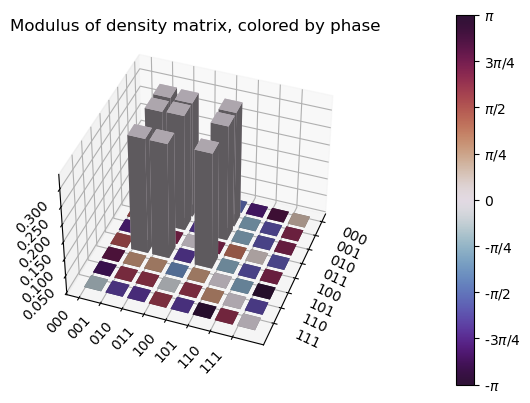

0.9982467474494888


In [8]:
tomo = tQST(3)
nq = tomo.get_num_of_qubits()

diagonal = [0, 333, 333, 0, 333, 0, 0, 0]
N = np.sum(diagonal)
print(N)
tomo.set_diagonal_counts(diagonal)
tdict = tomo.get_diagonal_counts()

threshold = dmt.gini_index(diagonal)
tomo.set_threshold(threshold)

proj_to_meas = tomo.get_projectors_to_measure()
print(proj_to_meas)


# tdict.setdefault('HHH', 0)
# tdict.setdefault('HHV', 333)
# tdict.setdefault('HVH', 333)
# tdict.setdefault('HVV', 0)
# tdict.setdefault('VHH', 333)
# tdict.setdefault('VHV', 0)
# tdict.setdefault('VVH', 0)
# tdict.setdefault('VVV', 0)
tdict.setdefault('HRR', 333/N)
tdict.setdefault('HRD', 167/N)
tdict.setdefault('RHR', 333/N)
tdict.setdefault('RHD', 167/N)
tdict.setdefault('RRH', 333/N)
tdict.setdefault('RDH', 167/N)

projs, counts = tomo.read_tomo_dictionary(tdict)

tomo.set_density_matrix_model(model_triangular)

rho_rec = tomo.get_density_matrix(projs, counts)
dmt.plot_density_matrix_3D(rho_rec)

rho_target = dmt.density_matrix_W(3)

F = dmt.fidelity(rho_rec, rho_target)

print(F)